In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [5]:
#mean=age
#chi-squared independence of variables

In [6]:
survey = pd.read_csv('survey_clean.csv')
survey


age  Gender         Country self_employed family_history treatment  \
0      37  female   United States            No             No       Yes   
1      44    male   United States            No             No        No   
2      32    male          Canada            No             No        No   
3      31    male  United Kingdom            No            Yes       Yes   
4      31    male   United States            No             No        No   
...   ...     ...             ...           ...            ...       ...   
1246   26    male  United Kingdom            No             No       Yes   
1247   32    male   United States            No            Yes       Yes   
1248   34    male   United States            No            Yes       Yes   
1249   46  female   United States            No             No        No   
1250   25    male   United States            No            Yes       Yes   

     work_interfere    no_employees remote_work tech_company  ...  \
0             Often            6-25          No          Yes  ...   
1            Rarely  More than 1000          No           No  ...   
2            Rarely            6-25          No          Yes  ...   
3             Often          26-100          No          Yes  ...   
4             Never         100-500         Yes          Yes  ...   
...             ...             ...         ...          ...  ...   
1246        Unknown          26-100          No          Yes  ...   
1247          Often          26-100         Yes          Yes  ...   
1248      Sometimes  More than 1000          No          Yes  ...   
1249        Unknown         100-500         Yes          Yes  ...   
1250      Sometimes          26-100          No           No  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1246       Somewhat easy                        No                      No   
1247  Somewhat difficult                        No                      No   
1248  Somewhat difficult                       Yes                     Yes   
1249          Don't know                       Yes                      No   
1250          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1246  Some of them  Some of them                      No   
1247  Some of them           Yes                      No   
1248            No            No                      No   
1249            No            No                      No   
1250  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence age_range  
0                    Maybe                Yes              No     31-65  
1                       No         Don't know              No     31-65  
2                      Yes                 No              No     31-65  
3                    Maybe                 No             Yes     31-65  
4                      Yes         Don't know              No     31-65  
...                    ...                ...             ...       ...  
1246                    No         Don't know              No     21-30  
1247          

In [17]:
number = LabelEncoder()
for i in survey.columns:
    survey[i] = number.fit_transform(survey[i].astype('str'))

In [18]:
corr=survey.corr()['treatment']
corr[np.argsort(corr,axis=0)[::-1]]

treatment                    1.000000
family_history               0.376674
care_options                 0.235429
benefits                     0.224731
obs_consequence              0.152524
anonymity                    0.142364
mental_health_interview      0.093528
wellness_program             0.091278
seek_help                    0.089175
Country                      0.088757
coworkers                    0.070248
age_range                    0.063094
mental_vs_physical           0.062774
leave                        0.060389
phys_health_interview        0.049399
mental_health_consequence    0.027054
remote_work                  0.026507
self_employed                0.016442
phys_health_consequence     -0.014454
age                         -0.017272
tech_company                -0.032521
work_interfere              -0.032855
supervisor                  -0.033424
no_employees                -0.048033
Gender                      -0.152619
Name: treatment, dtype: float64

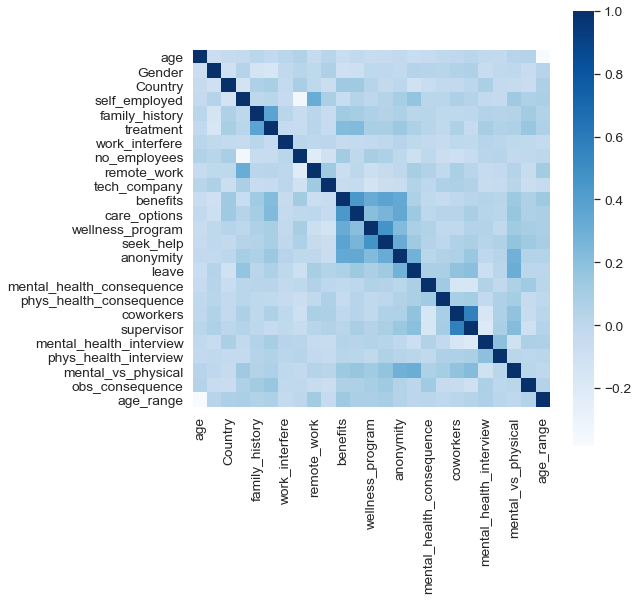

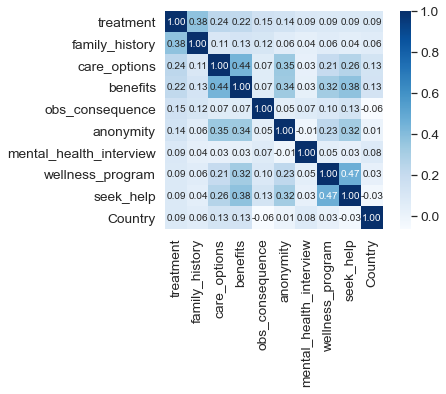

In [19]:
features_correlation = survey.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()


k = 10
cols = features_correlation.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(survey[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap='Blues', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
#benefits,care_options correlated with each other
#wellness_program,seek_help and anonymity are correlated with each other 
#coworkers and supervisor are correlated with each other 
#family history and treatment are correlated with each other 

In [11]:
#corr_2 = data.corr(method = 'spearman')

NameError: name 'data' is not defined